# EBA3500 Lecture 12. The law of large numbers

The law of large numbers and the central limit theorem are two cornerstones of classical statistics. Informally, they state the following:

1. **Law of large numbers** A sequence of independent sample means will converge to their their expected value.
2. **Central limit theorem** A sequence of *normalized* independent means will converge to the normal distribution.

We also have the generalized form the central limit theorem, which states that *for most estimators*, we have that
$$\sqrt{n}(\hat{\theta} -\theta) \to N(0,\sigma^2)$$

## Consistency and law of large numbers

Recall the following from last time:

#### Definition (Estimator) ([Wikipedia source](https://en.wikipedia.org/wiki/Estimator))
> In statistics, an estimator is a rule for calculating an estimate of a given quantity based on observed data: thus the rule (the estimator), the quantity of interest (the estimand) and its result (the estimate) are distinguished. For example, the sample mean is a commonly used estimator of the population mean.

#### Definition (Unbiased estimator)
> An estimator is *unbiased* if $E(\hat{\theta}_n) = \theta$.

Most popular estimators are not unbiased, and it is *not* an important property in most scenarios. For instance, the estimated regression coefficients in a logistic regression are not unbiased. Neither are the estimated regression coefficients when using least absolute deviations. However, the sampled variance $S^2 = \frac{1}{n-1}\sum (X_i - \overline{X})^2$ is unbiased. 

But, if we shouldn't care about unbiased estimators, what should we care about? The concept we're looking for is *consistency*, that our estimators get closer and closer to the population value as $n\to \infty$. To formalize this concept, we will need to discuss convergence in probability.

#### Definition (Convergence in probability)
> A sequence of random variables $X_{n}$ *converges in probability* to $\theta$ if $P(|X_{n}-\theta|>\epsilon)\to0$ as $n\to\infty$ for all $\epsilon>0$ .

Typically, the sequence of random variables in this definition are estimators, $\hat{\theta}^n$. This definition looks, and is, quite mathematical, even with a scary $\epsilon$ inside! Let's take a closer look at what it means.

#### Examples
1. Let $X_n$ be normal with standard deviation $1/\sqrt{n}$ and mean $0$. Then $X_n$ converges in probability to 0.
2. Let $X_n$ be a sequence of random variables that is eventually constant, i.e., there is an $N$ and a $c$ so that $X_n = c$ for all $n\geq N$.
3. Let $X_n = X(-1)^n$ for some non-constant random variable $X$. Then $X_n$ will oscillate between $-X$ and $X$ indefinitely, and does not converge. When $n$ is even, $(-1)^n= 1$, when $n$ is odd, $(-1)^n = -1$.

#### Definition (Consistency)
> An estimator $\hat{\theta}_n$ is *consistent* for $\theta$ if it converges in probability to $\theta$.

Let's look at a small simulation when $n\to\infty$ approximately.
 

In [1]:
import numpy as np
rng = np.random.default_rng(seed = 313)
n = 10**6 # "infinity"
y = rng.normal(3, 2, n) # Mean is 3.
means = np.cumsum(y) /  (np.arange(n) + 1) #mth element is the mean of the first m elements.
means

array([2.7904635 , 4.09585475, 3.47360899, ..., 3.00114897, 3.00114554,
       3.00114765])

<AxesSubplot:>

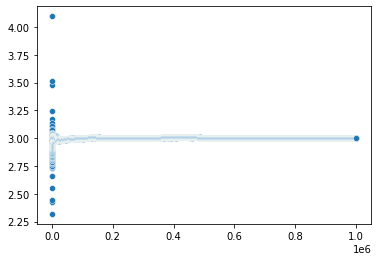

In [2]:
import seaborn as sns
sns.scatterplot(x = np.arange(n) + 1, y = means)


I appears that the mean is consistent for the $\mu$ parameter in the normal distribution. This happens to be true.

Let's look at the median too!

In [4]:
y = rng.normal(3, 2, n) # Mean is 3.
indices = np.arange(1000, n+1, 1000) - 1
indices

array([   999,   1999,   2999,   3999,   4999,   5999,   6999,   7999,
         8999,   9999,  10999,  11999,  12999,  13999,  14999,  15999,
        16999,  17999,  18999,  19999,  20999,  21999,  22999,  23999,
        24999,  25999,  26999,  27999,  28999,  29999,  30999,  31999,
        32999,  33999,  34999,  35999,  36999,  37999,  38999,  39999,
        40999,  41999,  42999,  43999,  44999,  45999,  46999,  47999,
        48999,  49999,  50999,  51999,  52999,  53999,  54999,  55999,
        56999,  57999,  58999,  59999,  60999,  61999,  62999,  63999,
        64999,  65999,  66999,  67999,  68999,  69999,  70999,  71999,
        72999,  73999,  74999,  75999,  76999,  77999,  78999,  79999,
        80999,  81999,  82999,  83999,  84999,  85999,  86999,  87999,
        88999,  89999,  90999,  91999,  92999,  93999,  94999,  95999,
        96999,  97999,  98999,  99999, 100999, 101999, 102999, 103999,
       104999, 105999, 106999, 107999, 108999, 109999, 110999, 111999,
      

In [5]:
medians = [np.median(y[:indices[i]]) for i in range(len(indices))]
medians

[3.0620276068539543,
 3.042733592011169,
 3.0798881126230864,
 3.030182824564073,
 3.0150962652529785,
 3.011963411852139,
 3.001419122225076,
 2.995078072233461,
 2.991713785221252,
 2.9878587545960857,
 2.988119744624073,
 2.984562656984709,
 2.99039102970069,
 2.9895325863825497,
 2.996920637328619,
 2.989780819532506,
 2.9988012549324146,
 2.9974149677657485,
 3.001578479213868,
 3.0003067818758753,
 2.9991915143671255,
 2.9974149677657485,
 2.995957410317071,
 2.9909829072029313,
 2.992750112640429,
 2.990408837560927,
 2.986682777422892,
 2.9873537367000123,
 2.9879571770135303,
 2.987098563377104,
 2.988110269137216,
 2.9892827308580645,
 2.989780819532506,
 2.991616951112847,
 2.9940249799131142,
 2.9912468229938174,
 2.9892361116661355,
 2.987662785259604,
 2.986682777422892,
 2.9848120894047843,
 2.986700093849154,
 2.987214059552036,
 2.99039102970069,
 2.989743328632579,
 2.9904069348683895,
 2.989580270355341,
 2.9921197725197266,
 2.9899453214954566,
 2.988110269137216,
 

<AxesSubplot:>

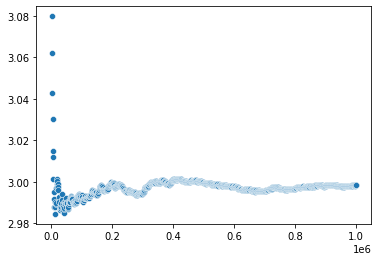

In [6]:
sns.scatterplot(x = indices + 1, y = medians)

And the sample median appears to be consistent for the mean in a normal distribution too! This is, in fact, true.

In [8]:
rng = np.random.default_rng(seed = 313)
n = 10**6
y = rng.exponential(1, n) # Mean is 1.
means = np.cumsum(y) /  (np.arange(n) + 1)
means

array([0.97812657, 0.58551963, 1.59679599, ..., 0.99814086, 0.9981417 ,
       0.99814128])

In [9]:
indices = np.arange(1000, n+1, 1000) - 1
medians = [np.median(y[:indices[i]]) for i in range(len(indices))]
medians

[0.7283282893470722,
 0.7239599808571696,
 0.7033643190305746,
 0.7007120985880414,
 0.7012660057514701,
 0.6987192237357154,
 0.6990046776588915,
 0.6976128902219519,
 0.6931250559682006,
 0.6924757730576473,
 0.6955064521376022,
 0.6965358520413409,
 0.6972809865924721,
 0.6972809865924721,
 0.6972809865924721,
 0.6987842231143518,
 0.7025814477070498,
 0.7046335592275641,
 0.7013194503582828,
 0.7013194503582828,
 0.7052024079860426,
 0.7062478070916922,
 0.7064285867589167,
 0.7077368628154802,
 0.7064381068804275,
 0.7066840940639609,
 0.7060677234170476,
 0.7064381068804275,
 0.7034684525607728,
 0.7043706268602712,
 0.7034903393439448,
 0.704286245992189,
 0.7053722737062504,
 0.7032491331011168,
 0.7028456598589564,
 0.7017211535555614,
 0.7009959100896924,
 0.7012303459972559,
 0.7001331750598169,
 0.6981302071022365,
 0.6977311809788406,
 0.6973233160772663,
 0.6974067083708632,
 0.6966210630831156,
 0.6963645045055459,
 0.6969031955268274,
 0.6972809865924721,
 0.69732331607

We conclude, informally, that the sample median isn't consistent for the mean of the exponential distribution. Do you understand why this is the case? 


**N.B:** This isn't a course in mathematics, and proving consistency and convergence in probability is often quite difficult. It is important, however, to know what it means. 

Consistency is often thought of as the bare minimum requirement of an estimator. For if an estimator isn't consistent, we *know* that it won't approximate the true population quantity arbitrarily well when $n\to\infty$. Since the point of an estimator is measure something, this seems bad.


### Proposition
> Suppose the model conditions for the linear regression model holds true. Then the regression coefficients $\hat{\beta}_i$ are unbiased, have variance converging to $0$, and are consistent.

That an estimator $\hat{\theta}$ is unbiased and has variance converging to $0$ actually implies that $\hat{\theta}$ is consistent.

### Proposition
> Suppose that $\hat{\theta}_n$ be unbiased for $\theta$, i.e., $E(\hat{\theta}_n) = \theta$. Moreover, suppose that the variance of $\hat{\theta}$ converges to $0$ as $n\to\infty$. Then $\hat{\theta}_n \to \theta$ in probability. In other words, $\hat{\theta}_n$ is consistent for $\theta$.

##### Proof
Let $\sigma_{n}^{2}=\textrm{Var}\hat{\theta}_{n}.$ By [Chebyshev's inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality),
$$
P(|\hat{\theta}_{n}-\theta|\geq\epsilon)\leq\frac{\sigma_{n}^{2}}{\epsilon^{2}}.
$$
Let $\epsilon$ be fixed. Since $\sigma_{n}^{2}\to0$ by assumption,
$\frac{\sigma_{n}^{2}}{\epsilon^{2}}\to0$ as well. Then, since $P(|\hat{\theta}_{n}-\theta|\geq\epsilon \leq\frac{\sigma_{n}^{2}}{\epsilon^{2}}$,
we find that $P(|\hat{\theta}_{n}-\theta|\geq\epsilon) \to 0$ too.

### Corollary: Law of large numbers
Assume $X_n$ is an independent sequence of identically distributed variables with common mean $\mu$ and finite variance $\sigma^2$. Let $\overline{X}_n$ denote the mean, $\overline{X}_n = n^{-1}\sum_{i=1}^n{X_i}$. Then $X_n\to\mu$ in probability.

#### Proof
Exercise. Use the previous Proposition to prove it.


Two facts:
1. The law of large numbers also holds when the variance $\sigma^2$ is infinite. The proof is *much* harder though. 
2. This form of the law of large numbers is sometimes called the weak law of large numbers. There is a strong law of large numbers too, which uses a stronger form of convergence than convergence in probability, called *convergence with probability $1$*. There is no practical difference between these two laws for a non-mathematician.

## Summary
1. Convergence in probability is one way to capture the idea that a random quantity converges to something.
2. An estimator is *consistent* if it approximates the population value arbitrarily well as $n\to \infty$.
3. You can informally check if an estimator is consistent by running simulations. Statisticians do this all the time!
3. The law of large numbers states that $\overline{X}\to \mu$ when the $X_i$ variables are independent and identically distributed.